In [1]:
from fastbook import *

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
path

the below code makes it so whenever we print the path inside our folder of choice (for example when using .ls()), the complete path from C: onwards is not printed. It is replaced by Path

In [3]:
Path.BASE_PATH = path

In [ ]:
path.ls()
# (path/"annotations").ls()

In [ ]:
len((path/"images").ls())

In [6]:
fname = (path/"images").ls()[0]
type(fname),type(fname.name)

(pathlib.WindowsPath, str)

In [7]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['Abyssinian']

In [ ]:
# doc(RandomSplitter)
# doc(DataBlock)
doc(DataLoaders)

In [4]:
pets = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                 splitter=RandomSplitter(seed=21),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224,min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [ ]:
# pets.summary(path/"images")

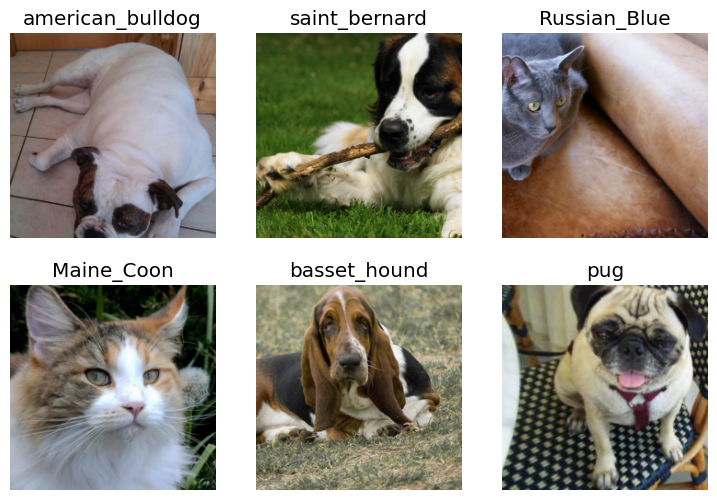

In [9]:
dls.show_batch(nrows=2,ncols=3)

In [ ]:
# x,y = dls.one_batch()

In [ ]:
# y

64 values for batch size=64. Each entry is a single integer between 0 and 36, representing 37 possible breeds.

creating a basic model

In [ ]:
# learn = vision_learner(dls,resnet34,metrics=error_rate)
# learn.fine_tune(2)

In [ ]:
# learn = load_learner('pet_breed_50.pkl')

creating a confusion matrix to see where our basic model is making mistakes

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
# interp.most_confused(min_val=3)

In [ ]:
# learn.export('pet_breed.pkl')

In [ ]:
# learn = vision_learner(dls,resnet34,metrics=error_rate)
# lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum,steep))

In [ ]:
# print(f'Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

training model using learning rate from lr_find

In [ ]:
# learn = vision_learner(dls,resnet34,metrics=error_rate)
# learn.fine_tune(3,base_lr=3e-3)

In [ ]:
# learn.unfreeze()

In [ ]:
# learn.lr_find()

In [ ]:
# learn.fit_one_cycle(6,lr_max=1e-5)

discriminative learning rates

In [5]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fit_one_cycle(3,3e-3)
learn.unfreeze()
learn.fit_one_cycle(8,lr_max=slice(1e-6,1e-4))

c:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.138013,0.321839,0.099459,01:37
1,0.533895,0.247627,0.080514,01:27
2,0.330992,0.234078,0.073072,01:21


epoch,train_loss,valid_loss,error_rate,time
0,0.251964,0.221152,0.075101,02:03
1,0.243382,0.212764,0.069689,02:06
2,0.221347,0.223443,0.071719,02:18
3,0.210457,0.212870,0.070365,02:04
4,0.187454,0.210754,0.070365,02:02
5,0.161885,0.211534,0.069689,02:04
6,0.155631,0.208986,0.070365,02:48
7,0.147877,0.209739,0.070365,03:03


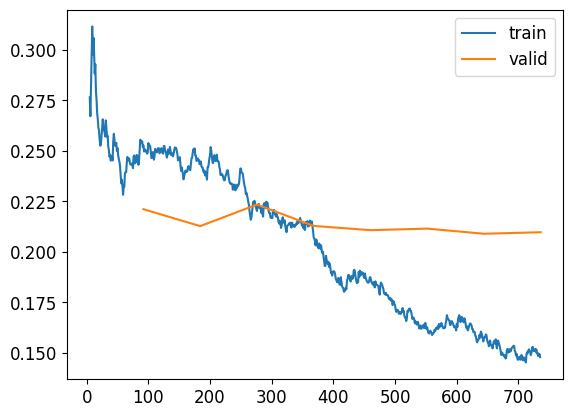

In [6]:
learn.recorder.plot_loss()

In [8]:
import dill

In [9]:
with open('pet_breed.pkl','wb') as f:
    dill.dump(learn,f)
with open('pet_breed_50.pkl','rb') as f:
    new_learn = dill.load(f)

[('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('beagle', 'basset_hound', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('yorkshire_terrier', 'havanese', 3)]

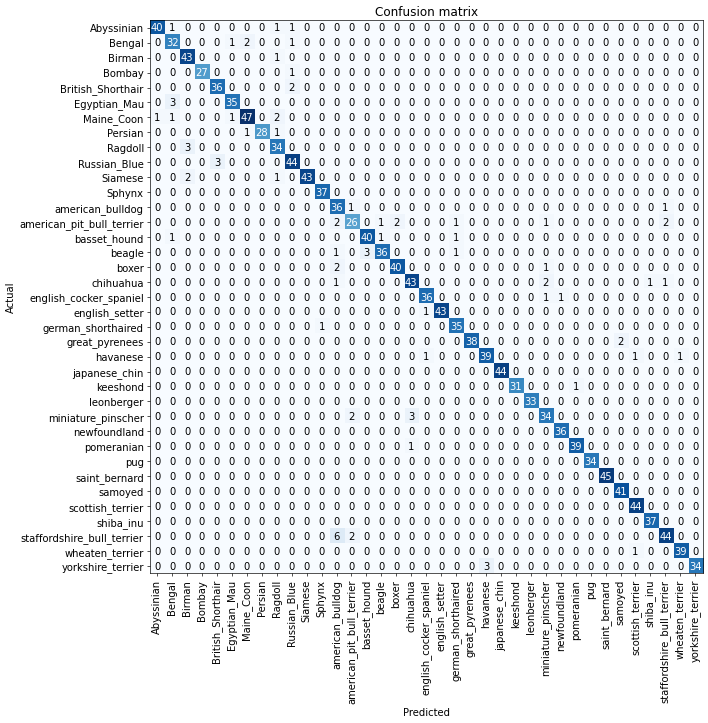

In [10]:
interp = ClassificationInterpretation.from_learner(new_learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)
interp.most_confused(min_val=3)

In [11]:
if learn.summary()==new_learn.summary():
    print('same')
else:
    print('different')

different


In [ ]:
# learn.export('pet_breed.pkl')

Deeper architectures

In [10]:
from fastai.callback.fp16 import*

In [11]:
learn = vision_learner(dls,resnet50,metrics=error_rate)
learn.fine_tune(6,freeze_epochs=3)

c:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.286794,0.284054,0.094046,17:58
1,0.599676,0.298179,0.098106,16:07
2,0.429532,0.306149,0.095399,15:47


epoch,train_loss,valid_loss,error_rate,time
0,0.275324,0.227518,0.082544,20:07
1,0.297734,0.319137,0.088633,20:06
2,0.241636,0.296115,0.080514,20:05
3,0.153278,0.241638,0.073072,20:04
4,0.085388,0.188991,0.056834,20:05
5,0.052502,0.184669,0.057510,20:12


[('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('beagle', 'basset_hound', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('yorkshire_terrier', 'havanese', 3)]

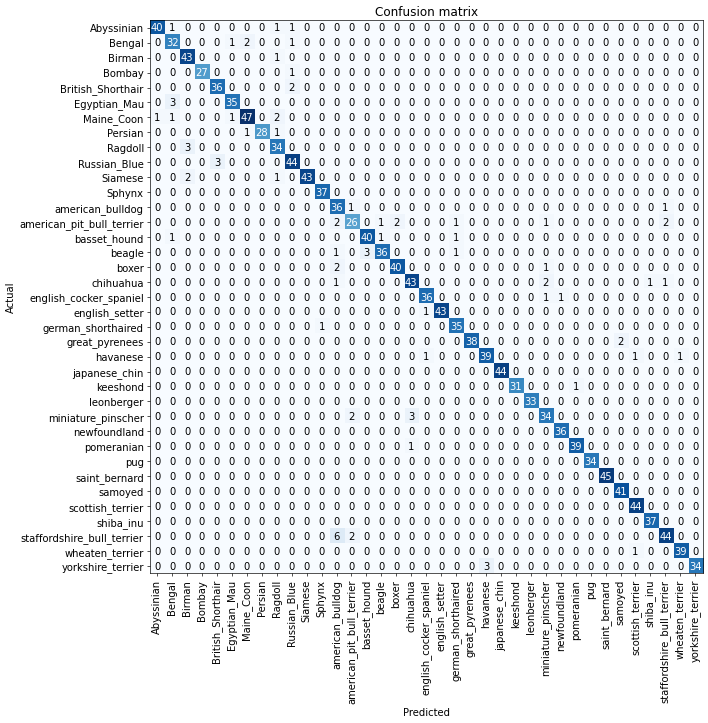

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)
interp.most_confused(min_val=3)

learn.export again saved corrupted files. Honestly just use dill. maybe also try torch.save()

In [ ]:
# learn.export('pet_breed_50.pkl')

In [14]:
with open('pet_breed_50.pkl','wb') as f:
    dill.dump(learn,f)

In [15]:
with open('pet_breed_50.pkl','rb') as f:
    new_learn = dill.load(f)

In [ ]:
interp = ClassificationInterpretation.from_learner(new_learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)
interp.most_confused(min_val=3)

In [18]:
if learn.summary()==new_learn.summary():
    print('same')
else:
    print('different')

same


In [19]:
labels = dls.vocab
labels

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [20]:
def breed(image):
    img = PILImage.create(image)
    _,idx,_ = learn.predict(img)
    return labels[img]

In [22]:
# import gradio as gr

In [ ]:
# gr.Interface(fn=breed, inputs=gr.inputs.Image(shape=(512, 512)), outputs="text",title = "Pet Breed Classifier",description = "Pet breed classifier").launch(share=True)